In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing 
%matplotlib inline 


In [2]:
weather_df=pd.read_csv('C:/Users/Gaurangi Tyagi/Downloads/kanpur.csv',parse_dates=['date_time'],index_col='date_time')
weather_df.head(5)

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0.0,8.7,4,1,31,09:56 AM,09:45 PM,06:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


In [3]:
weather_df.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [4]:
weather_df.shape


(96432, 24)

In [5]:
weather_df.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.00000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,33.400199,22.374564,0.0,11.037805,6.877053,4.465012,46.094077,13.230629,30.735783,30.86884,29.088384,14.211766,16.993550,44.370479,0.037756,1006.217946,27.429577,9.885214,205.537270,9.734092
std,6.994211,7.635253,0.0,2.152973,1.551294,3.414374,31.249725,8.053778,9.320398,9.17754,8.051981,6.926605,23.150025,22.484991,0.307143,7.593850,8.459575,1.058515,104.369548,4.835331
min,15.000000,3.000000,0.0,4.000000,3.000000,1.000000,0.000000,-14.000000,4.000000,7.00000,4.000000,0.000000,0.000000,2.000000,0.000000,986.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,16.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.00000,24.000000,9.000000,0.000000,26.000000,0.000000,1000.000000,21.000000,10.000000,101.000000,6.000000
50%,34.000000,24.000000,0.0,11.600000,7.000000,5.000000,46.000000,12.000000,31.000000,31.00000,29.000000,14.000000,5.000000,42.000000,0.000000,1006.000000,28.000000,10.000000,240.000000,9.000000
75%,38.000000,28.000000,0.0,13.000000,8.000000,8.000000,73.000000,21.000000,38.000000,38.00000,35.000000,18.000000,27.000000,61.000000,0.000000,1013.000000,33.000000,10.000000,299.000000,12.000000
max,51.000000,39.000000,0.0,13.900000,11.000000,11.000000,100.000000,31.000000,65.000000,65.00000,54.000000,75.000000,100.000000,100.000000,20.600000,1024.000000,50.000000,20.000000,360.000000,47.000000


In [6]:
weather_df.isnull().any()

maxtempC             False
mintempC             False
totalSnow_cm         False
sunHour              False
uvIndex              False
uvIndex.1            False
moon_illumination    False
moonrise             False
moonset              False
sunrise              False
sunset               False
DewPointC            False
FeelsLikeC           False
HeatIndexC           False
WindChillC           False
WindGustKmph         False
cloudcover           False
humidity             False
precipMM             False
pressure             False
tempC                False
visibility           False
winddirDegree        False
windspeedKmph        False
dtype: bool

In [7]:
weather_df_num=weather_df.loc[:,['maxtempC','mintempC','cloudcover','humidity','tempC','HeatIndexC', 'precipMM', 'pressure','windspeedKmph']]
weather_df_num.head()

,maxtempC,mintempC,cloudcover,humidity,tempC,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,
2009-01-01 00:00:00,24,10,17,50,11,12,0.0,1015,10
2009-01-01 01:00:00,24,10,11,52,11,13,0.0,1015,11
2009-01-01 02:00:00,24,10,6,55,11,13,0.0,1015,11
2009-01-01 03:00:00,24,10,0,57,10,13,0.0,1015,12
2009-01-01 04:00:00,24,10,0,54,11,14,0.0,1016,11


In [8]:
weather_df_num.shape

(96432, 9)

In [9]:
weather_df_num.columns

Index(['maxtempC', 'mintempC', 'cloudcover', 'humidity', 'tempC', 'HeatIndexC',
       'precipMM', 'pressure', 'windspeedKmph'],
      dtype='object')

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>], dtype=object)

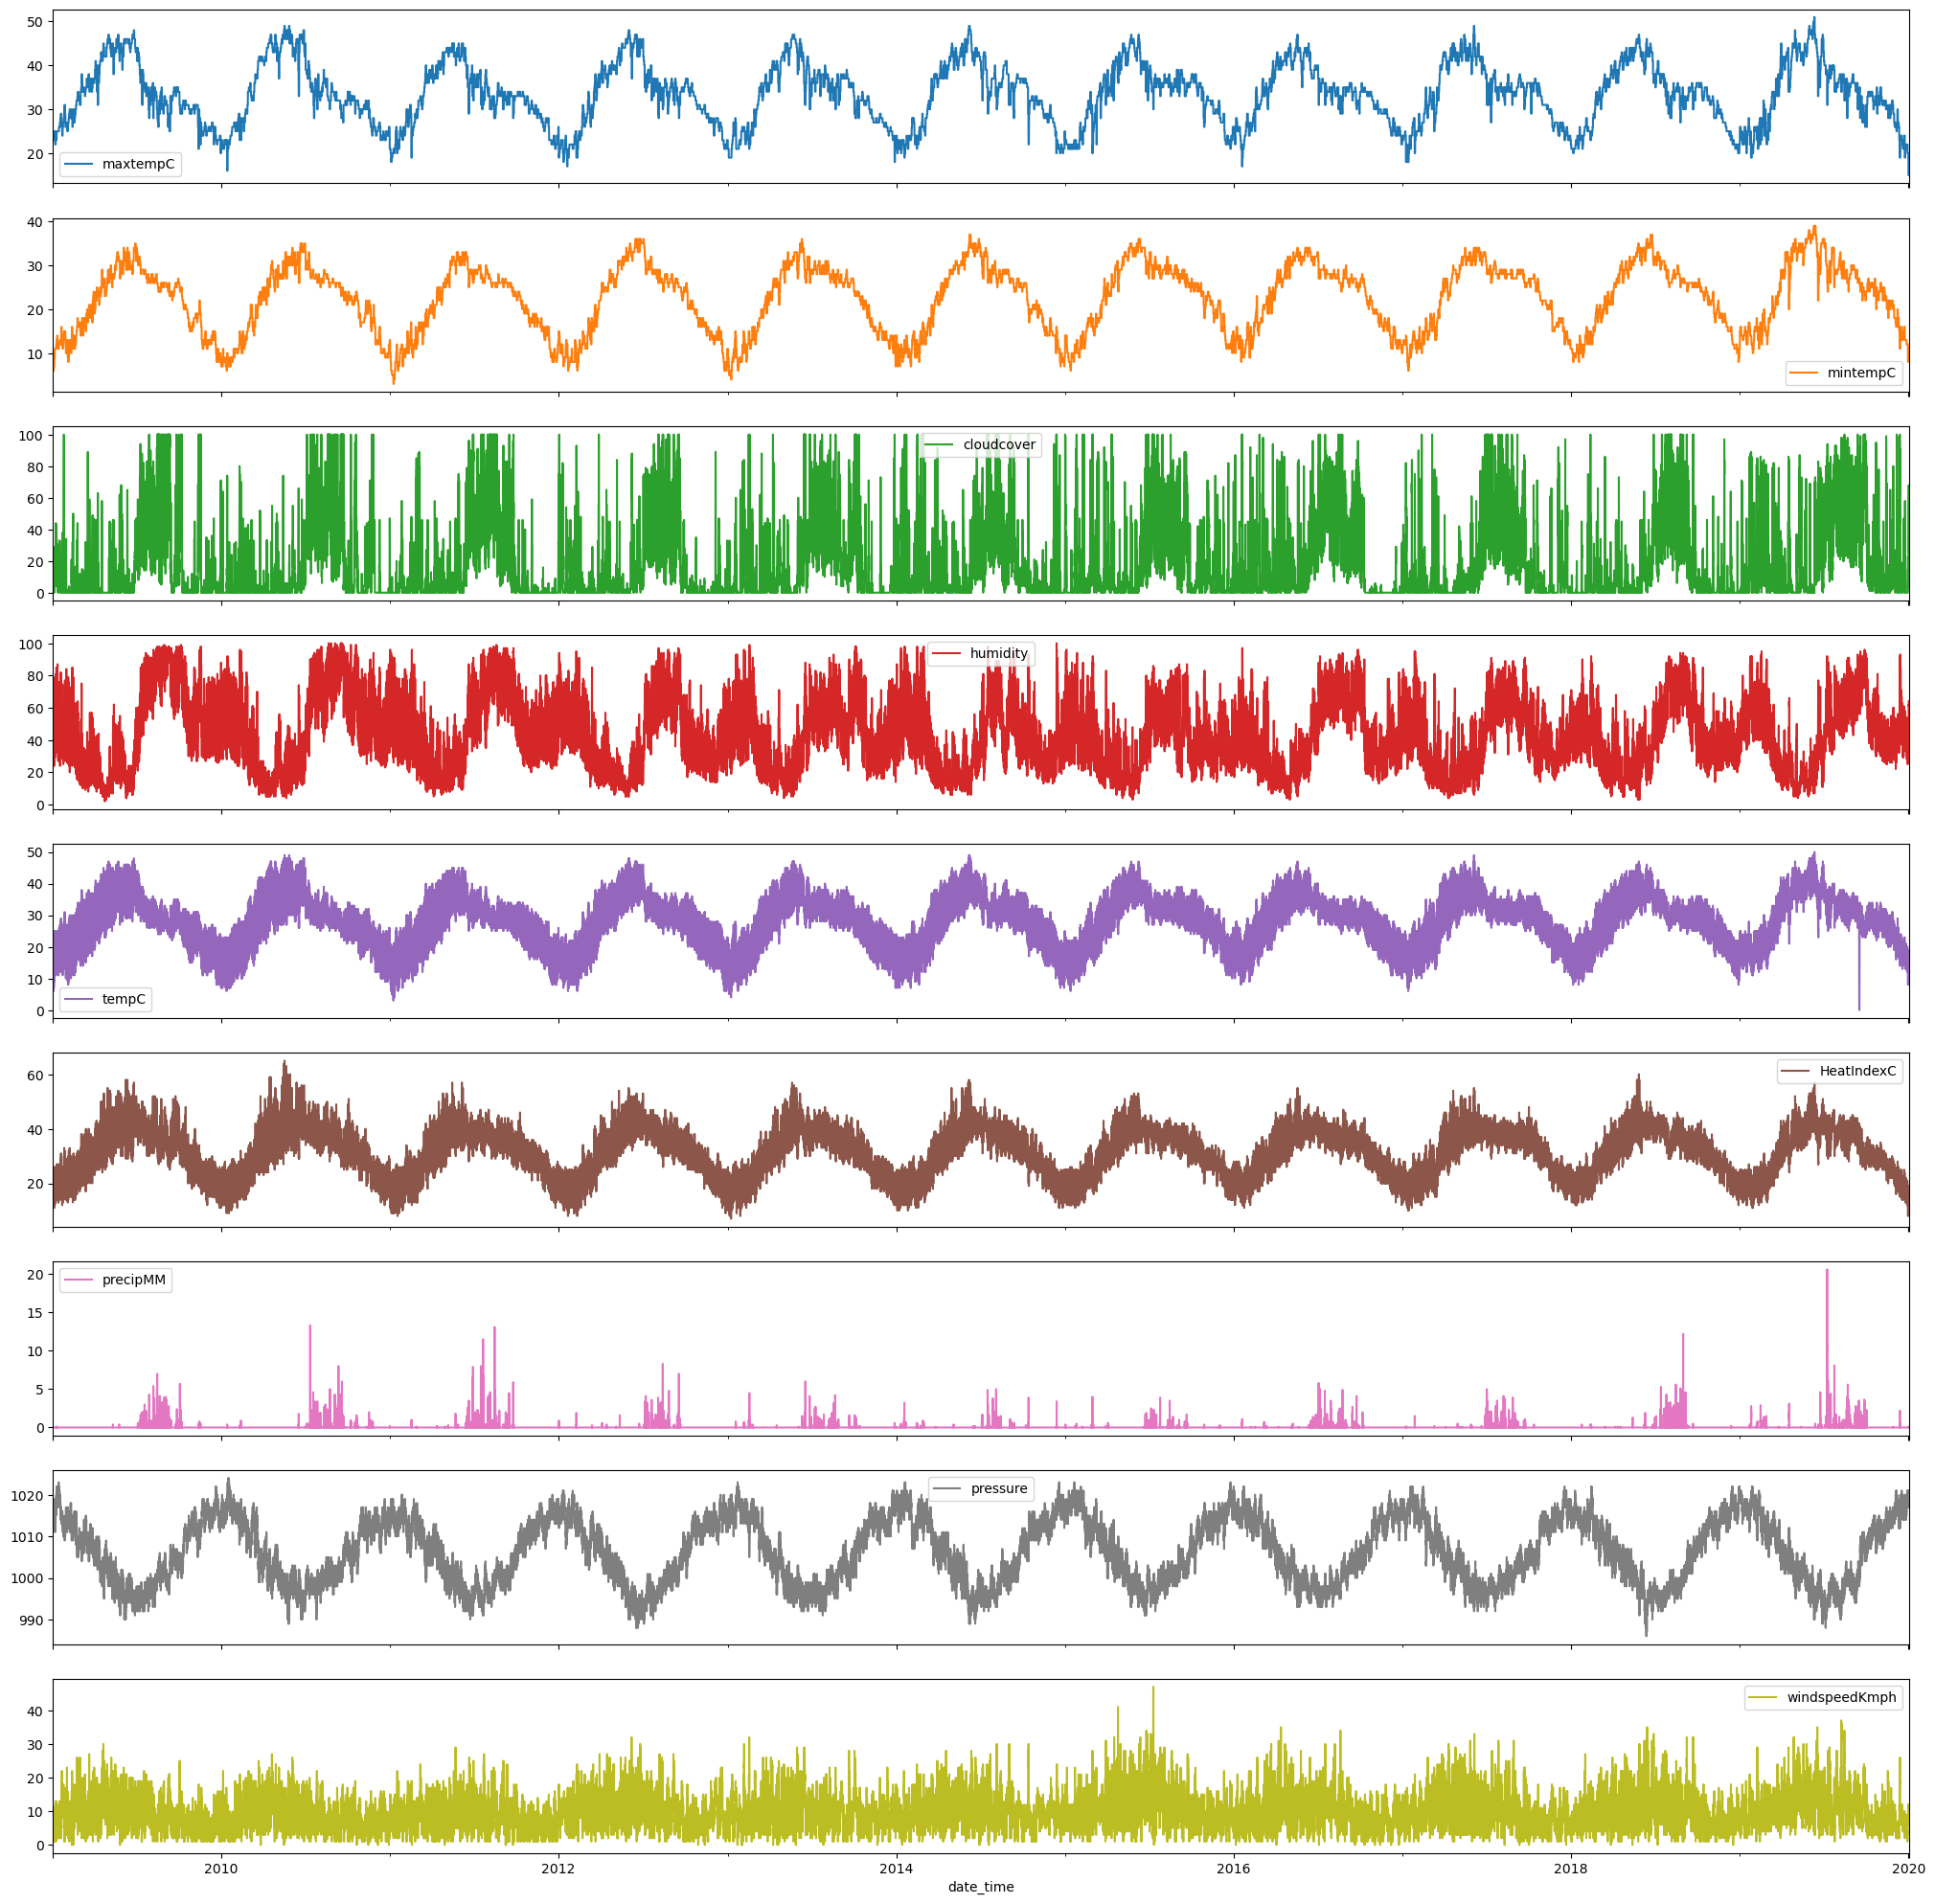

In [10]:
weather_df_num.plot(subplots=True,figsize=(25,25))

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>], dtype=object)

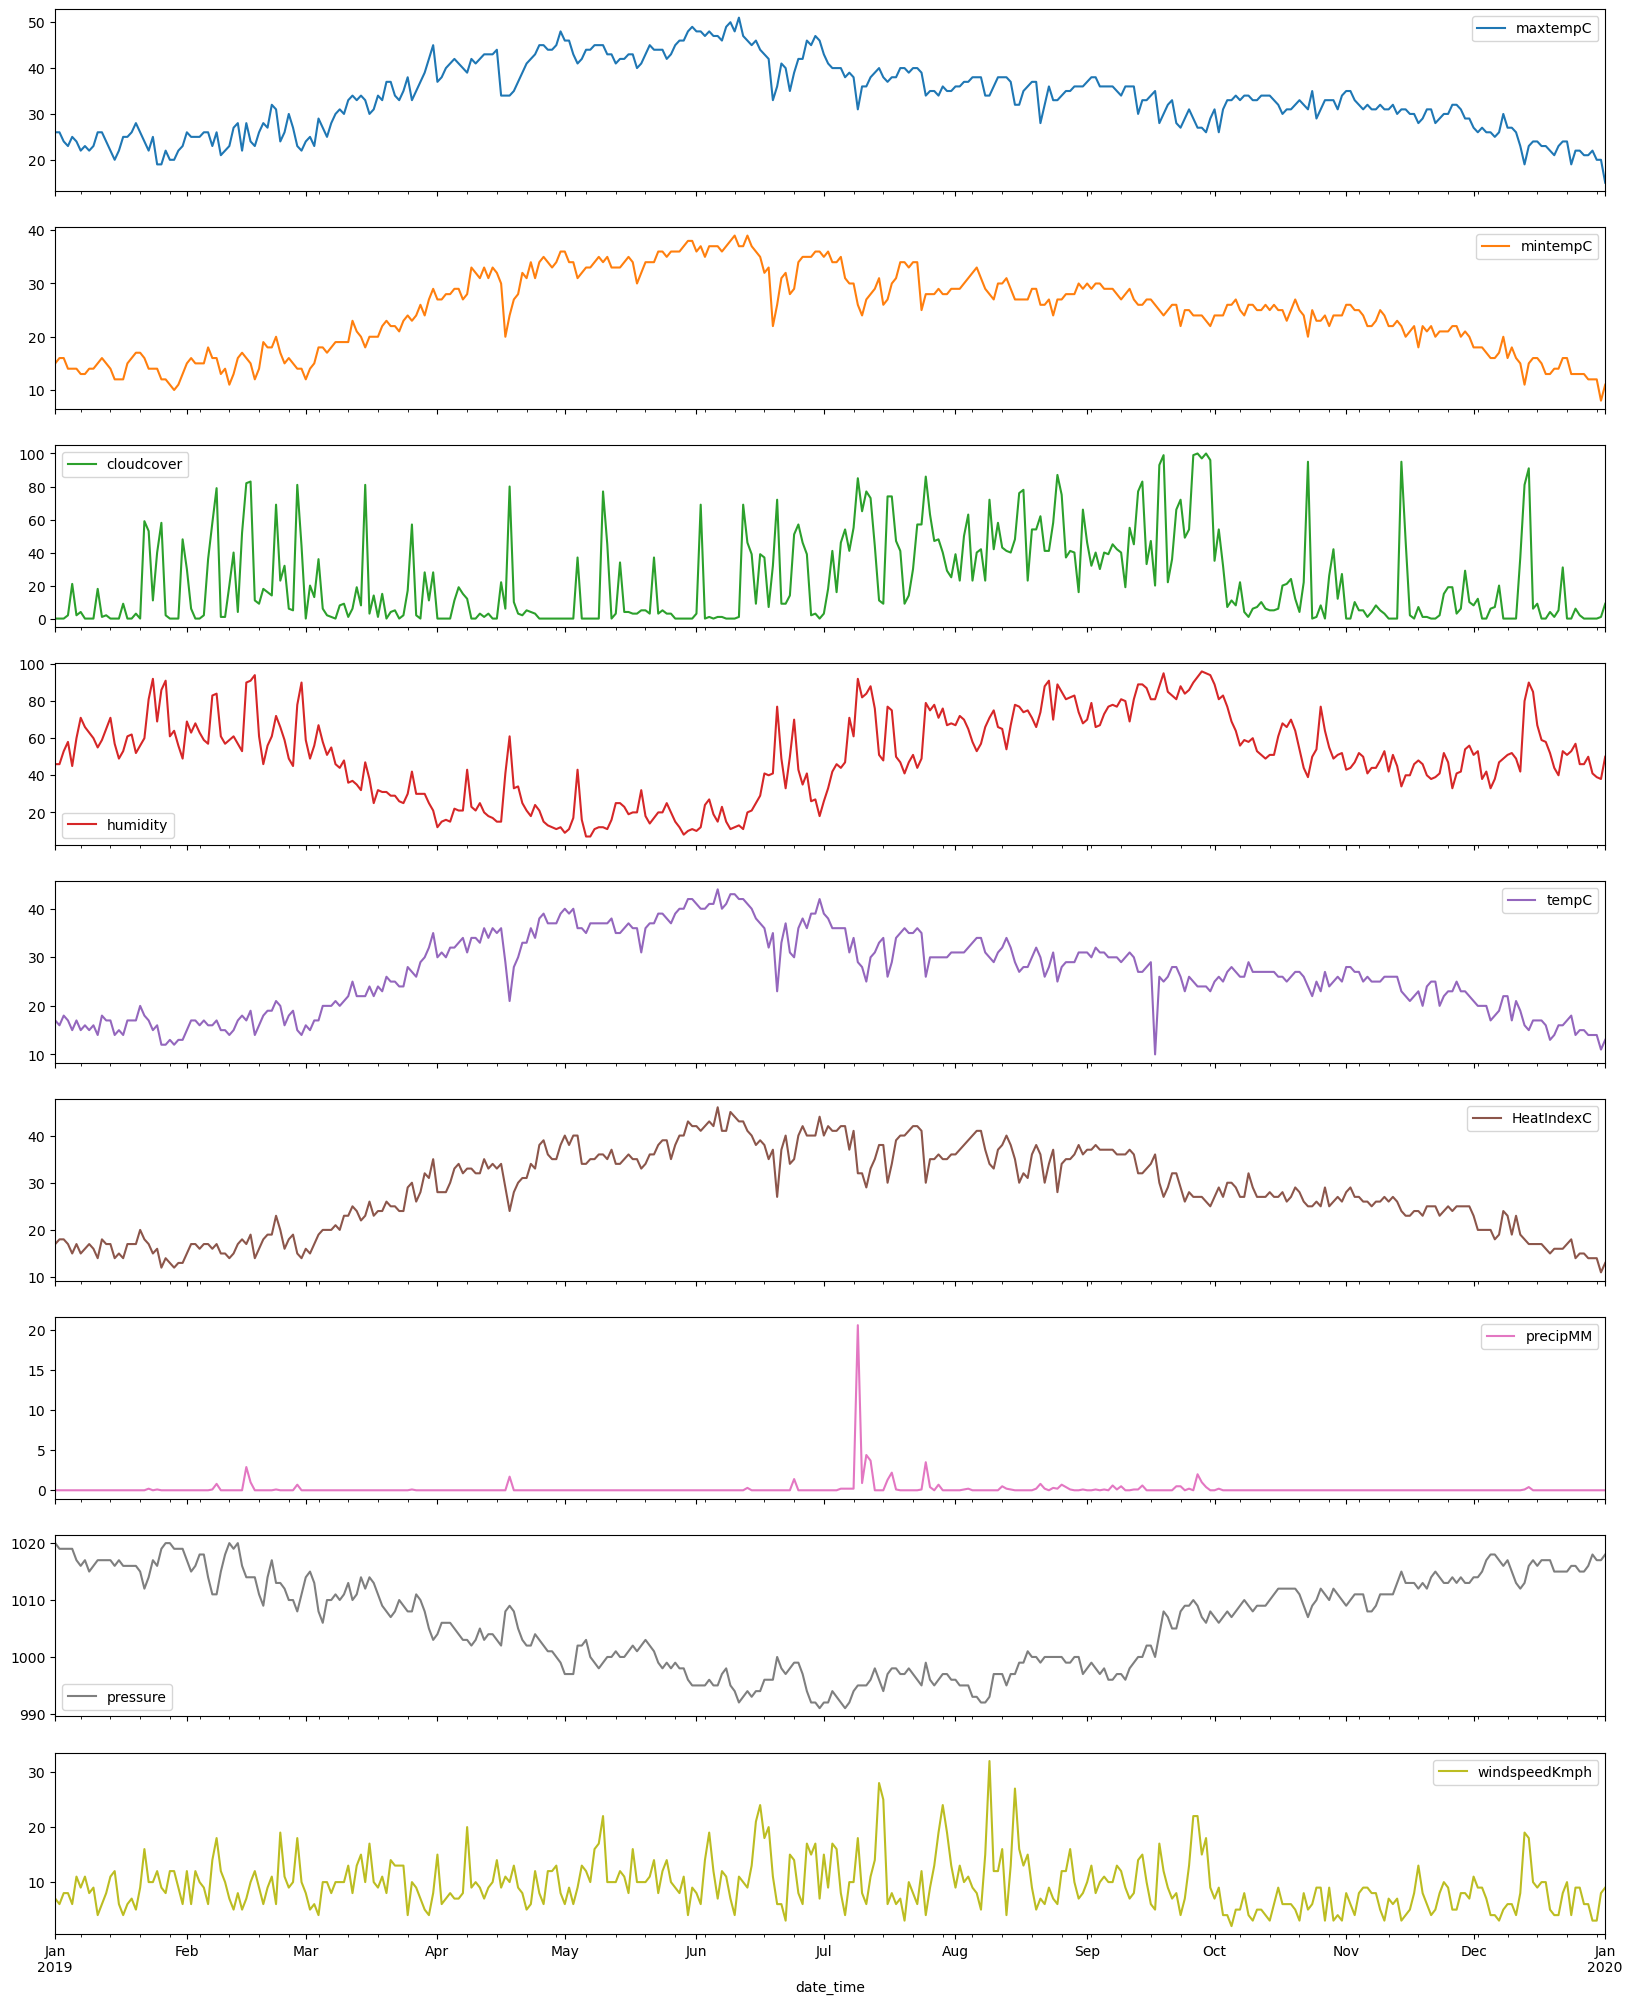

In [11]:
weather_df_num['2019':'2020'].resample('D').fillna(method='pad').plot(subplots=True,figsize=(20,25))

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'cloudcover'}>],
       [<Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'HeatIndexC'}>],
       [<Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'windspeedKmph'}>]], dtype=object)

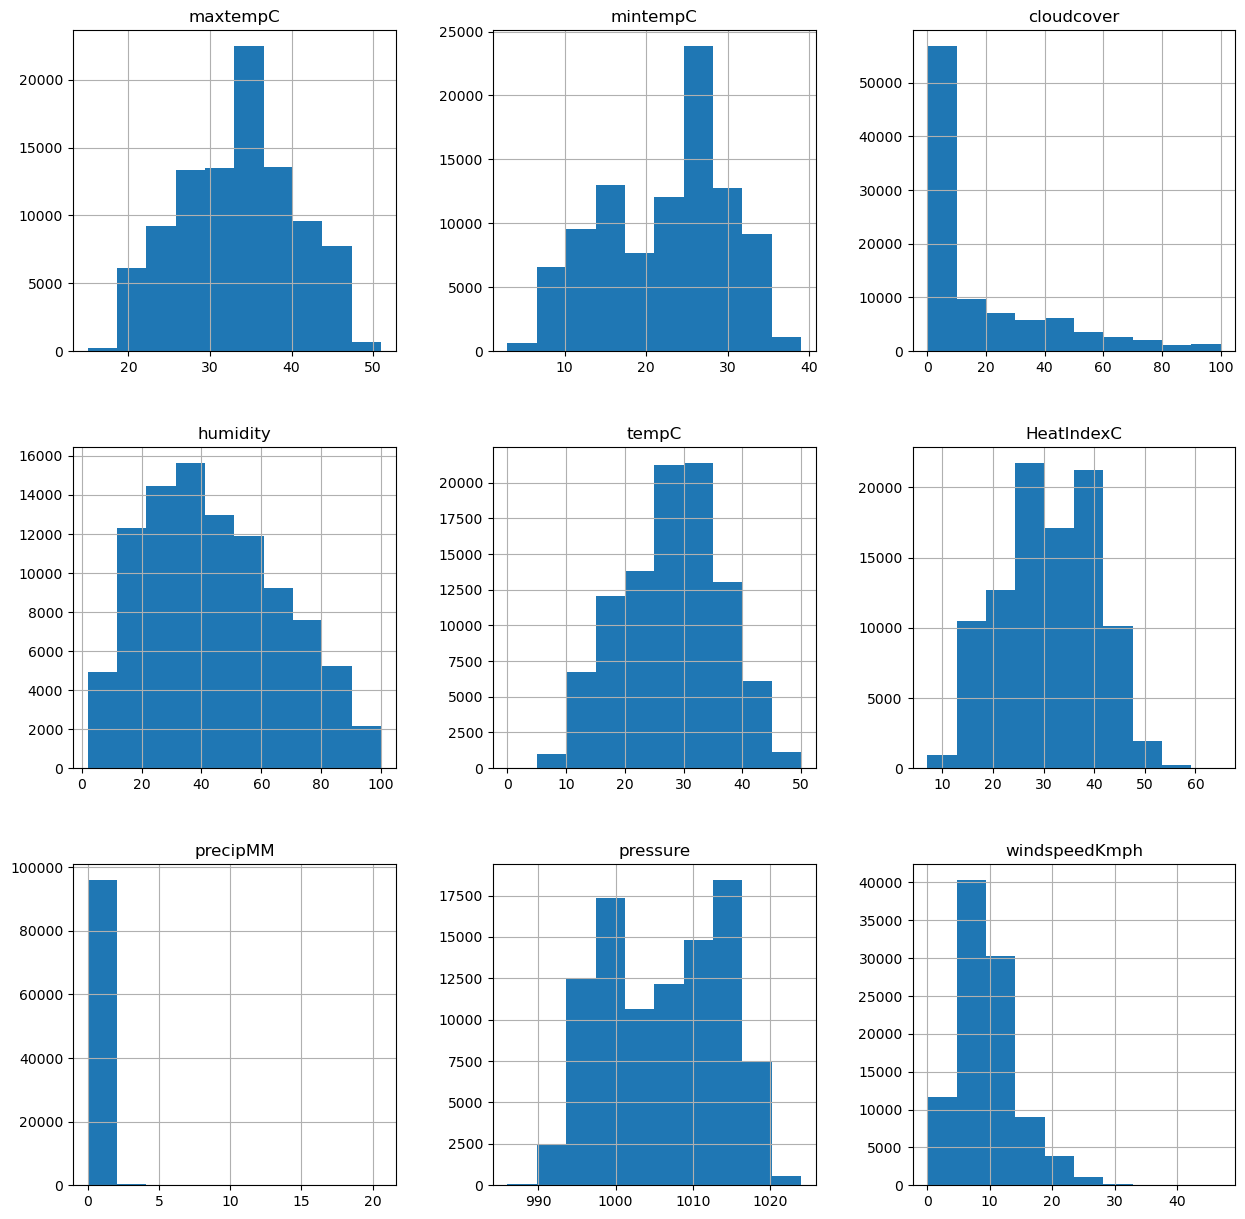

In [12]:
weather_df_num.hist(bins=10,figsize=(15,15))

In [13]:
weth=weather_df_num['2019':'2020']
weth.head(10)

,maxtempC,mintempC,cloudcover,humidity,tempC,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,,,
2019-01-01 00:00:00,26,15,0,46,17,17,0.0,1020,7
2019-01-01 01:00:00,26,15,0,46,17,17,0.0,1019,7
2019-01-01 02:00:00,26,15,0,47,16,16,0.0,1019,7
2019-01-01 03:00:00,26,15,0,48,16,16,0.0,1019,6
2019-01-01 04:00:00,26,15,0,48,16,16,0.0,1019,6
2019-01-01 05:00:00,26,15,0,49,16,16,0.0,1019,6
2019-01-01 06:00:00,26,15,0,49,15,15,0.0,1020,6
2019-01-01 07:00:00,26,15,0,48,16,17,0.0,1020,6
2019-01-01 08:00:00,26,15,0,46,17,18,0.0,1020,5


In [15]:
weather_y=weather_df_num.pop("tempC")
weather_x=weather_df_num



In [16]:
weather_y.head()

date_time
2009-01-01 00:00:00    11
2009-01-01 01:00:00    11
2009-01-01 02:00:00    11
2009-01-01 03:00:00    10
2009-01-01 04:00:00    11
Name: tempC, dtype: int64

In [18]:
train_x,test_x,train_y,test_y=train_test_split(weather_x,weather_y,test_size=0.2,random_state=4)

In [20]:
train_x.shape

(77145, 7)

In [21]:
train_y.shape

(77145,)

In [23]:
train_x.head()

,mintempC,cloudcover,humidity,HeatIndexC,precipMM,pressure,windspeedKmph
date_time,,,,,,,
2012-03-13 07:00:00,16,2,62,26,0.0,1013,14
2009-11-05 21:00:00,18,0,64,25,0.0,1014,6
2017-10-11 22:00:00,27,44,58,33,0.0,1006,3
2019-06-08 11:00:00,37,0,12,52,0.0,999,7
2019-03-06 05:00:00,17,0,58,18,0.0,1010,11


In [24]:
model=LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [25]:
prediction=model.predict(test_x)

In [26]:
np.mean(np.absolute(prediction-test_y))

1.2062821048907408

In [30]:
for i in range(len(prediction)):
    prediction[i]=round(prediction[i],2)
pd.DataFrame({'Actual':test_y,'Predicted':prediction,'diff':(test_y-prediction)})

,Actual,Predicted,diff
date_time,,,
2013-07-10 08:00:00,34,34.98,-0.98
2015-11-04 20:00:00,25,24.61,0.39
2015-09-21 09:00:00,34,35.25,-1.25
2017-02-16 11:00:00,28,25.11,2.89
2012-07-21 01:00:00,28,27.99,0.01
...,...,...,...
2019-03-30 09:00:00,37,33.38,3.62
2015-11-12 12:00:00,32,30.46,1.54
2019-12-31 05:00:00,8,9.26,-1.26


In [35]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(train_x,train_y)


DecisionTreeRegressor(random_state=0)

In [36]:
prediction2=regressor.predict(test_x)
np.mean(np.absolute(test_y-prediction2))

0.5829660738666805

In [37]:
print('Variance score : %.2f' % regressor.score(test_x,test_y))

Variance score : 0.98


In [38]:
for i in range(len(prediction2)):
    prediction2[i]=round(prediction2[i],2)
pd.DataFrame({'Actual':test_y,'prediction':prediction2,'diff':(test_y-prediction2)})

,Actual,prediction,diff
date_time,,,
2013-07-10 08:00:00,34,34.0,0.0
2015-11-04 20:00:00,25,25.0,0.0
2015-09-21 09:00:00,34,35.0,-1.0
2017-02-16 11:00:00,28,27.0,1.0
2012-07-21 01:00:00,28,28.0,0.0
...,...,...,...
2019-03-30 09:00:00,37,32.0,5.0
2015-11-12 12:00:00,32,32.0,0.0
2019-12-31 05:00:00,8,9.0,-1.0


In [41]:
from sklearn.ensemble import RandomForestRegressor 
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(train_x,train_y)

RandomForestRegressor(max_depth=90, random_state=0)

In [42]:
prediction3=regr.predict(test_x)
np.mean(np.absolute(test_y-prediction3))

0.49460410411472006

In [44]:
for i in range(len(prediction3)):
    prediction3[i]=round(prediction3[i],2)
pd.DataFrame({'actual':test_y,'predicted':prediction3,'diff':(test_y-prediction3)})

,actual,predicted,diff
date_time,,,
2013-07-10 08:00:00,34,33.86,0.14
2015-11-04 20:00:00,25,24.74,0.26
2015-09-21 09:00:00,34,34.58,-0.58
2017-02-16 11:00:00,28,27.06,0.94
2012-07-21 01:00:00,28,27.99,0.01
...,...,...,...
2019-03-30 09:00:00,37,32.55,4.45
2015-11-12 12:00:00,32,31.85,0.15
2019-12-31 05:00:00,8,8.89,-0.89


In [45]:
from sklearn.metrics import r2_score


In [54]:
print("for linear regression r2 score is :%.2f"%( r2_score(test_y,prediction)))

for linear regression r2 score is :0.96


In [55]:
print("for decision tree  r2 score is :%.2f"%( r2_score(test_y,prediction2)))

for decision tree  r2 score is :0.98


In [53]:
print("for random forest  r2 score is:%.2f "%( r2_score(test_y,prediction3)))

for random forest  r2 score is:0.99 
